## Introduction

Churn is a measurement of the percentage of accounts that cancel or choose not to renew their subscriptions. A high churn rate can negatively impact Monthly Recurring Revenue (MRR) and can also indicate dissatisfaction with a product or service.

Customer churn rate is a critical problem to telco providers industries because the higher the churn rate can significantly decrease the business profitability and revenue. To address this huge problems, we will analyze the telco providers data to identify which factors contributing to customer churn and will create strategies to avoid this happening. 

## Goal
Create a prediction of customer churn rate using several machine learning model and choose the best one

There are several steps that we need to do in order to get the predition:
1. Data Collection
2. Exploratory Data Analysis
3. Feature Engineering
4. Modeling


### 1. Data Collection
We will import some python libraries that will help us for this task. Moreover, I have also included the data that will be used to make the predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data file

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7032, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Let's make sure once again that there are non null values in our data

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

From the data above, we can see that there are no null data, we can skip the data cleaning

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen is actually a categorical, that is why the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.79 whereas 25% customers pay more than USD 89.85 per month



### 2. Exploratory Data Analysis

Let's try to check whether our data imbalanced or not using bar plot

In [8]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [9]:
df['Churn'].value_counts()*100/len(df['Churn'])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

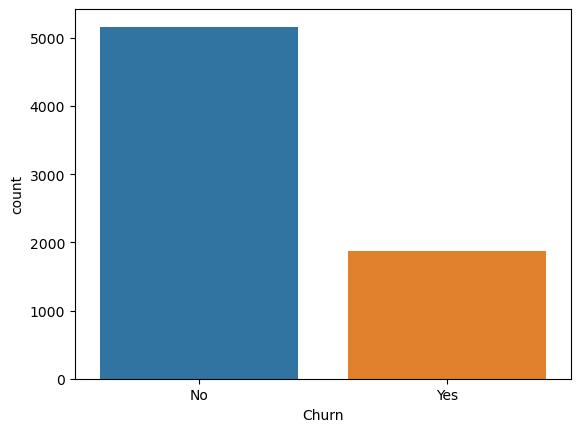

In [10]:
sns.countplot(data = df, x='Churn');

The data is imbalanced with ration = 73:27

<Axes: xlabel='Churn', ylabel='TotalCharges'>

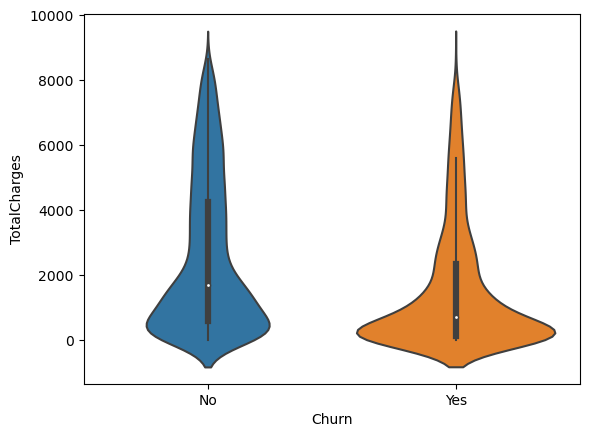

In [11]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

From the graph we can see that most churn happen when the total charges were lower, it might indicate that most ofthe people who were churning were someone who has monthly contract hence lower total charges, because they can just churn any time they want, because there is no yearly contract that bound them

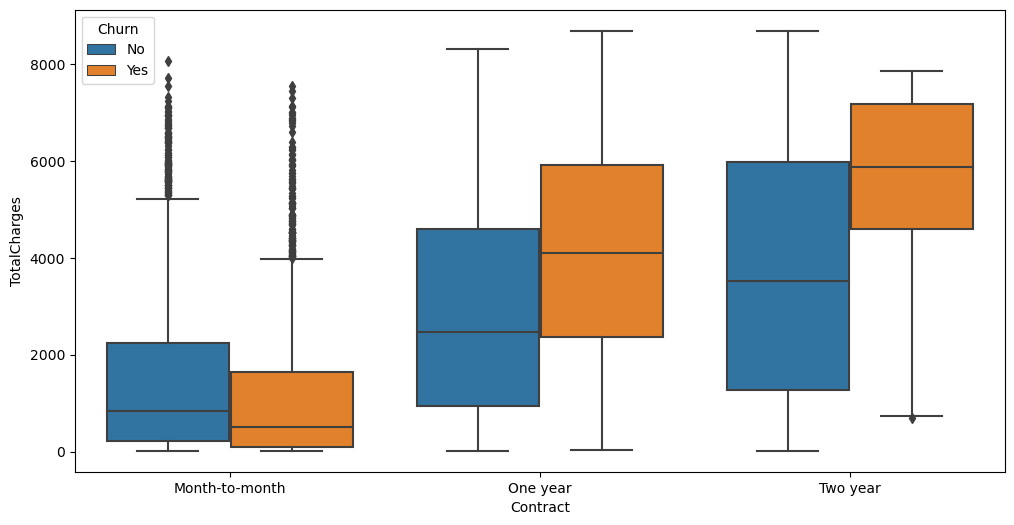

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn');

From the data above, we can conclude that people who were more likely to churn were the one that have a overall higher total charges.

it is more apparent for the two year contract, we can see that people who churn have  higher total charges.

From this data, we can break down it again and give suggestion to give the customer more discounts program after a year/ 2 year in so they are less likely to churn. And we can have more loyal customers that can give the company more money in the long run, rather than pay for more expensive service but didnt last for a year

In [13]:
df.groupby(['Contract', 'Churn'])[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()

tenure  MonthlyCharges  TotalCharges
Contract       Churn                                         
Month-to-month No     21.033333       61.462635   1521.927590
               Yes    14.016918       73.019396   1164.460574
One year       No     41.705972       62.540926   2903.569908
               Yes    44.963855       85.050904   4066.212048
Two year       No     56.948687       60.112798   3678.986103
               Yes    61.270833       86.777083   5432.363542

We can see from the table above that most of the people who ended up churning are the one who paid more than 70 per month for the monthly charges, which resulted in higher total charges. it was all aligned with box plot above, the monthly charges for people who end up churning were higher than the average of people who were not churning

### 3. Feature Engineering


<Axes: xlabel='tenure', ylabel='Count'>

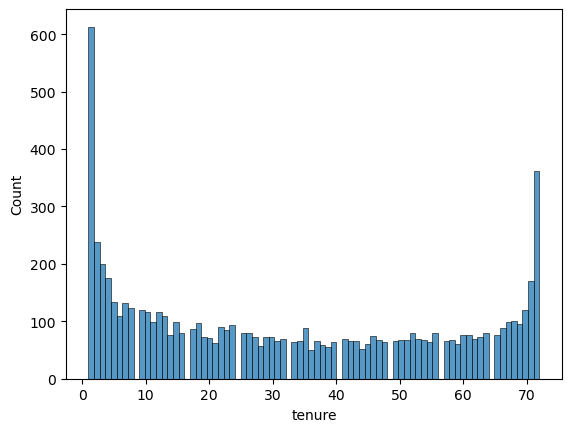

In [14]:
sns.histplot(x=df['tenure'], data=df, bins=80)

From the histogram above, we can see that most of our customer are from the monthly tenure which is the montly contract. And it will be hard for us to push longer contract for the keep them, because maybe they only need the service for amonth. So it will be wasteful to keep spending money on them by giving them discount to make them stay longer.

The second highest count are beyond 70 months it stated that they use our service because they neede, we just need to retain them as our customer

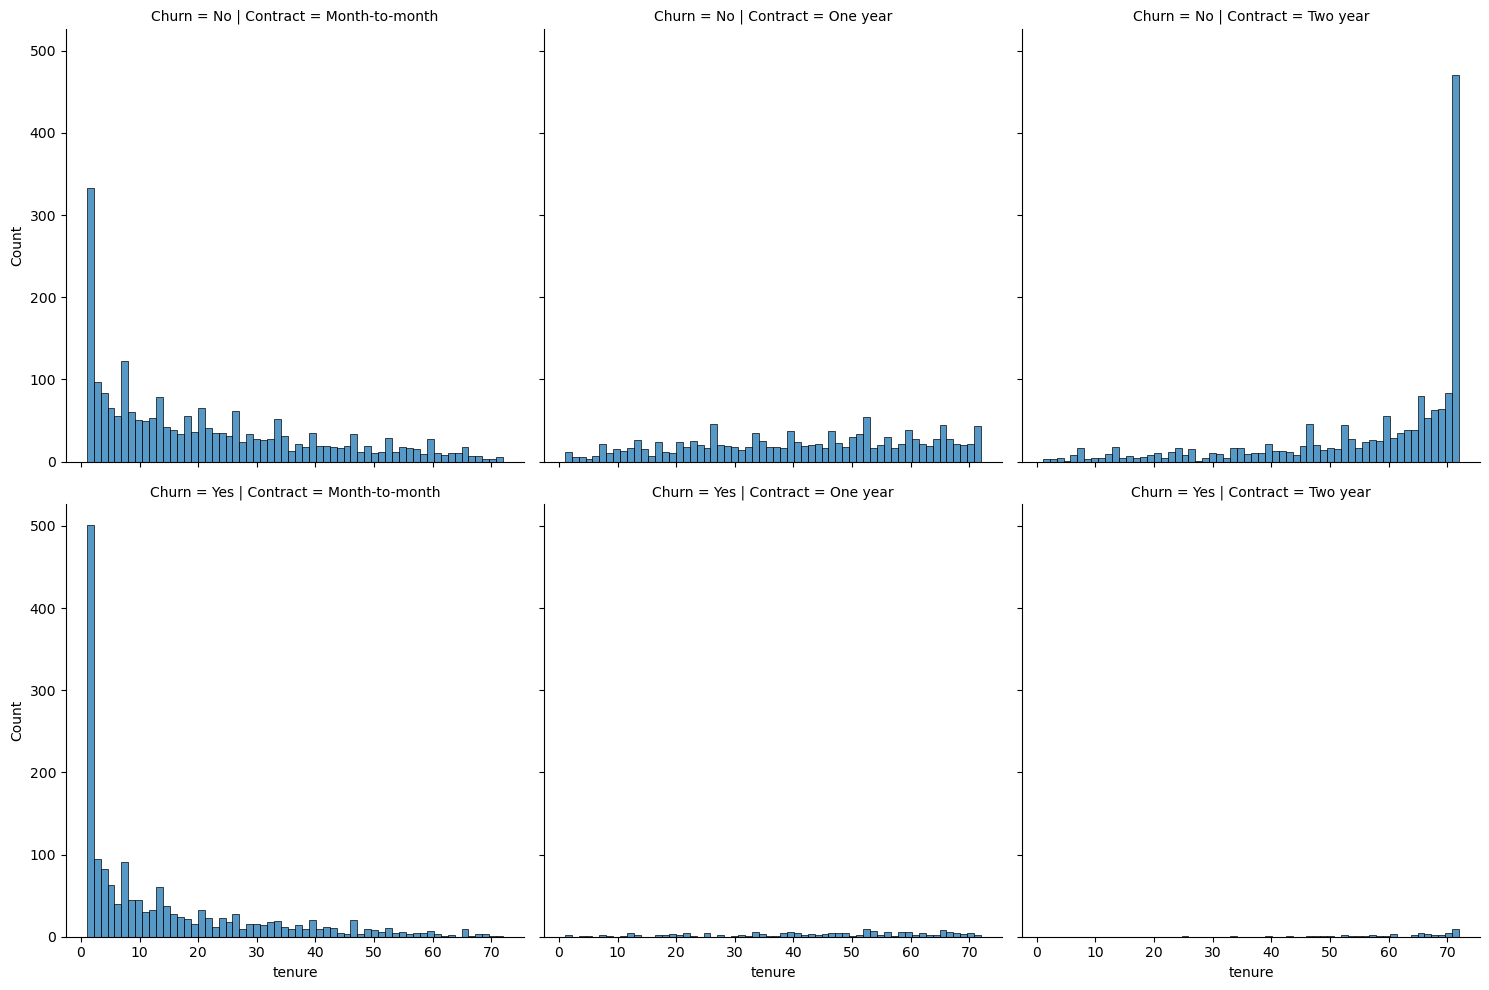

In [15]:
sns.displot(x=df['tenure'], data=df, bins=60, col= 'Contract', row='Churn');

The customer were more likely to churn in month to month contract copare to other type of contract.

We also notice on the churn =1 row, there are poeple that do month-month contract for more than a year. This might explain to use why they have higher monthly charges hence in the end they churn. We can give offer to this type of customer to turn them to longer contract and offer them cheaper price compare to their monthly charges.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

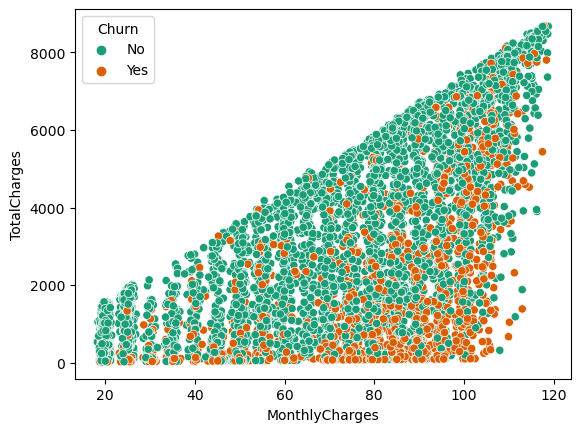

In [16]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn', palette="Dark2")

Let us see the churn rate based on customer's tenure, but first lets change the churn value first to numeric

In [17]:
df['Churn']= df['Churn'].map({'No': 0, 'Yes':1})

In [18]:
df.groupby('tenure')['Churn'].mean()*100

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn, Length: 72, dtype: float64

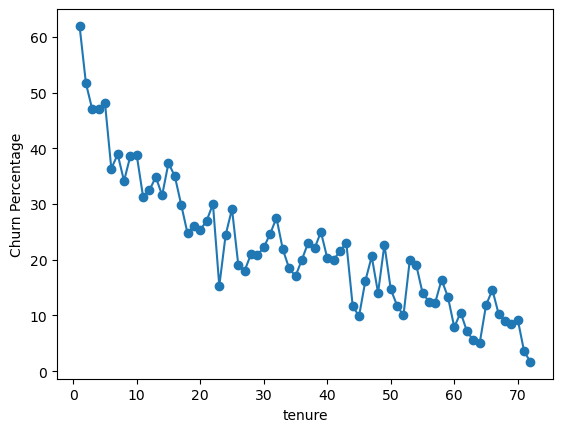

In [19]:
plt.plot(df.groupby('tenure')['Churn'].mean()*100, marker='o')
plt.xlabel('tenure')
plt.ylabel('Churn Percentage');

Now to make things easier, we will create a new column 'Tenure Cohort' based on the tenure column values that creates 4 separate categories:
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [20]:
df['Tenure Cohort'] = '' 

In [21]:
df.loc[((df['tenure']>=1) & (df['tenure']<=12)), 'Tenure Cohort'] = '0-12 Months'
df.loc[((df['tenure']>=13) & (df['tenure']<=24)), 'Tenure Cohort'] = '12-24 Months'
df.loc[((df['tenure']>=25) & (df['tenure']<=36)), 'Tenure Cohort'] = '24-36 Months'
df.loc[((df['tenure']>=37) & (df['tenure']<=48)), 'Tenure Cohort'] = '37-48 Months'
df.loc[(df['tenure']>=49), 'Tenure Cohort'] = 'Over 48 Months'

In [22]:
df[['tenure', 'Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-36 Months
2,2,0-12 Months
3,45,37-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-36 Months
9,62,Over 48 Months


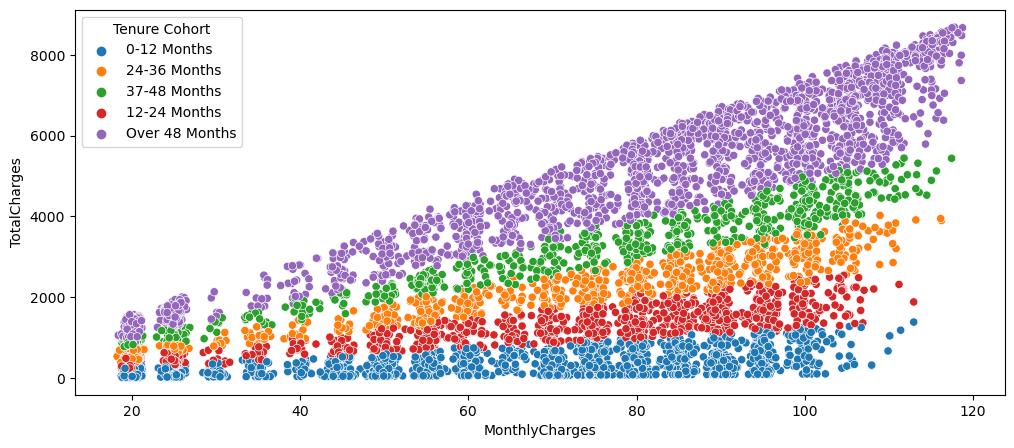

In [23]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Tenure Cohort');

From the scatter plot above, it was what we expected as well that the higher the total charges , the longer the monthly charges as well

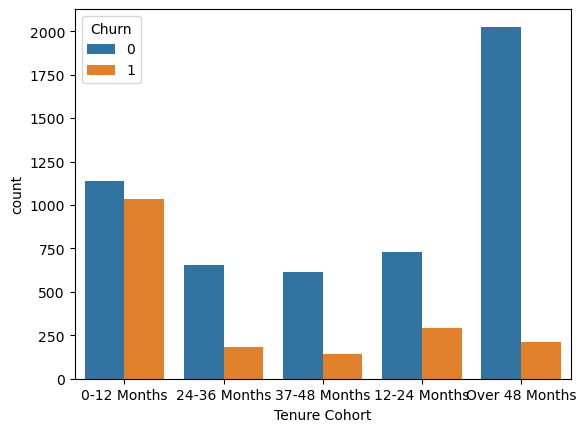

In [24]:
sns.countplot(data=df, x='Tenure Cohort', hue='Churn');

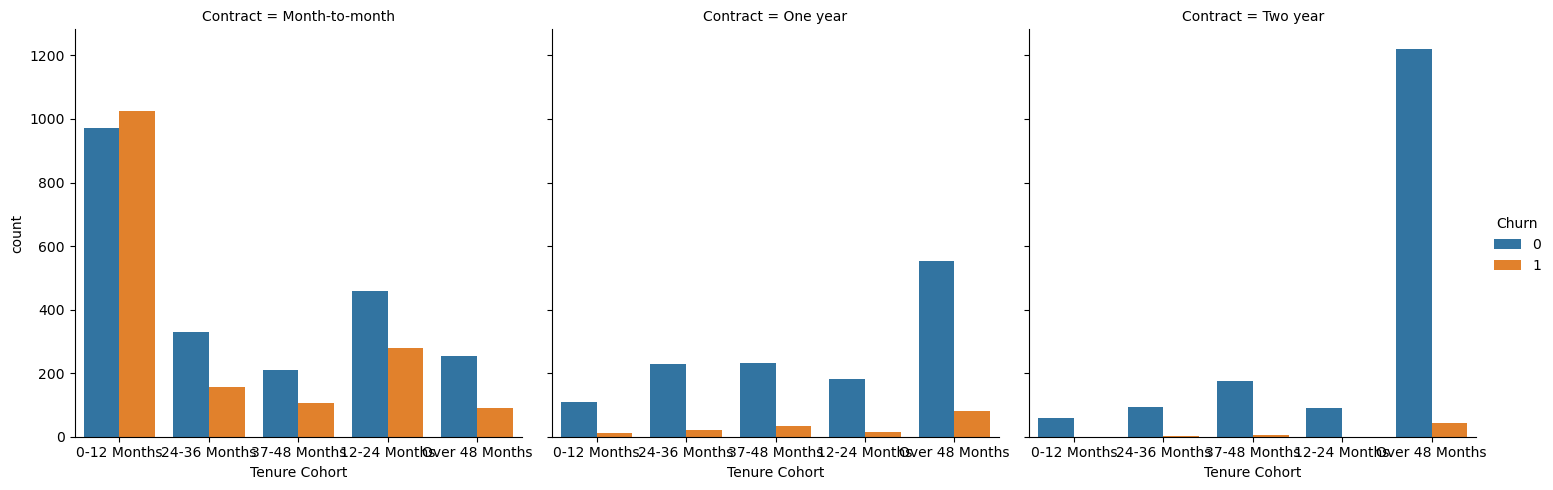

In [25]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col='Contract');

Now we will create correlation between the numerical and categorical column with Churn column. 

In [26]:
df_category= df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]

In [27]:
df_category.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,No,Yes,No,No,DSL,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,Yes,No,Yes,No,DSL,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,Yes,Yes,No,No,DSL,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,Yes,No,Yes,Yes,DSL,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,No,No,No,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check


In [28]:
df_category = pd.get_dummies(df_category)

In [29]:
df_combine = pd.concat([df_category, df['Churn']], axis=1)

In [30]:
df_combine.corr()['Churn'].sort_values(ascending = False)[1:]

Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Female                              0.008545
gender_Male                               -0.008545
MultipleLine

Now lets try to visualize it using bar chart

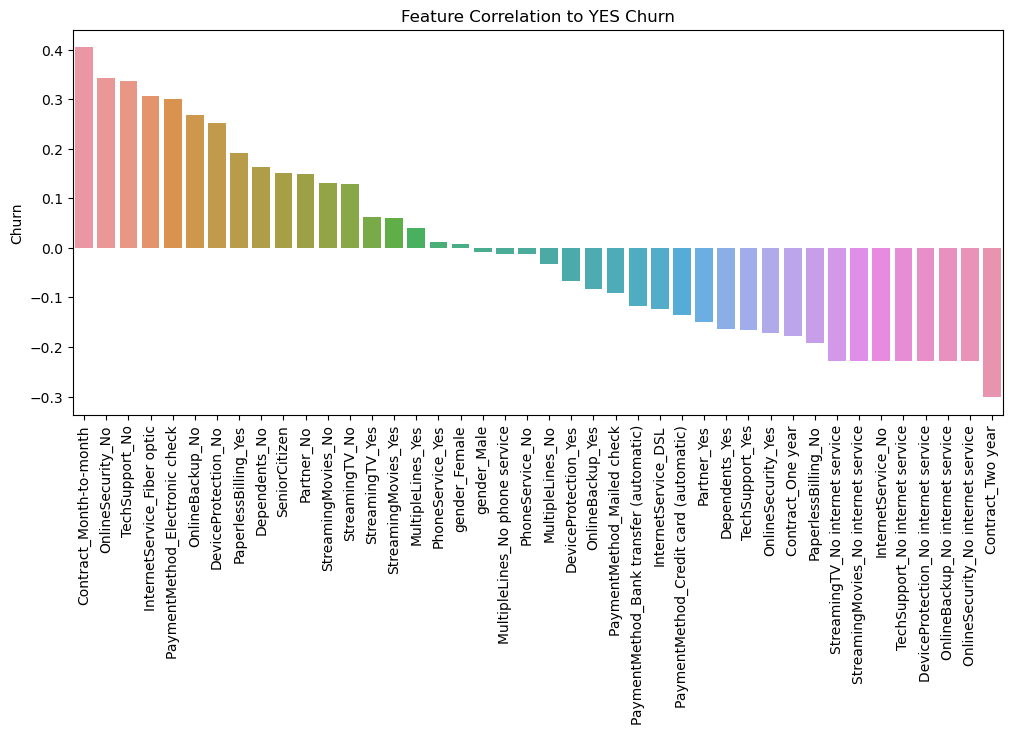

In [31]:

plt.figure(figsize=(12,5))
sns.barplot(x=df_combine.corr()['Churn'].sort_values(ascending = False)[1:].index, y= df_combine.corr()['Churn'].sort_values(ascending = False)[1:])
plt.xticks(rotation=90)
plt.title("Feature Correlation to YES Churn");

Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, Fibre Optics Internet, and Electronic check payment method. All of these were make senses because people who create contract montly able to break the contract easier hence to churn compare people who commit to two year contract

LOW Churn is seen in case of Long term contracts and no online security internet service.

Factors like Gender and # of multiple lines have alomost NO impact on Churn

### 4. Modelling

we will perform several classification model to our data to check which model give us the best predictive model

1. Logistic Regression
2. SVC Classification
2. Random Forrest
3. ADABoost
4. GradientBoosting
5. XGBoost

In [32]:
df['Churn'] = df['Churn'].map({0: 'No', 1: 'Yes'})

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-36 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


Lets first drop columns that we dont need

In [34]:
X = df.drop(['customerID', 'Churn'], axis=1)

In [35]:
X = pd.get_dummies(X, drop_first=True)

In [36]:
y = df['Churn']

Lets perform train test split and scale it

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Lets create a function that help us to report the accuracy score, classification report, and confusion matrix

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, classification_report

In [147]:
class Report():
    def __init__(self, model, X, X_train, X_test, y_train, y_test ):
        self.model = model
        self.X = X
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        self.y_pred_proba = self.model.predict_proba(self.X_test)
        
    def reporting(self):    
        accuracy = accuracy_score(self.y_test, self.y_pred)
        recall = recall_score(self.y_test, self.y_pred,pos_label='Yes')
        precision = precision_score(self.y_test, self.y_pred, pos_label='Yes')
        
        print("The model accuracy score is {:.2f}".format(accuracy))
        print("The model recall score is {:.2f}".format(recall))
        print("The model precision score is {:.2f}".format(precision))
        
    def class_report(self):
        print(classification_report(self.y_test, self.y_pred))
        
    def c_matrix(self):
        cm = confusion_matrix(self.y_test, self.y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= self.model.classes_ )
        disp.plot()
        plt.show()
        
    def coef_graph(self):

        coef_table = pd.DataFrame(index=  self.X.columns,
                                  data= self.model.coef_.flatten(), 
                                  columns=['Coefficient'])
        coef_table = coef_table.sort_values(by='Coefficient', ascending=False)
        
        print(coef_table.head())
        print(coef_table.tail())
        
        plt.figure(figsize=(12,6))
        sns.barplot(data = coef_table, x=coef_table.index, y='Coefficient')
        plt.xticks(rotation=90)
        plt.show()
        
    def f_importances(self):
        
        importance_table = pd.DataFrame(index= self.X.columns,
                                         data= self.model.feature_importances_.flatten(),
                                       columns =['Importances'])
        importance_table = importance_table.sort_values(by='Importances', ascending=False)
        
        print(importance_table.head())
        
        plt.figure(figsize=(12,6))
        sns.barplot(data = importance_table, x=importance_table.index, y='Importances')
        plt.xticks(rotation=90)
        plt.show()

    def predicted_probabilities (self):
        return self.y_pred_proba
        


### Logistic Linear

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_model = LogisticRegression()
#log_model = LogisticRegression(class_weight='balanced')

In [46]:
log_report = Report(log_model,X, X_train, X_test, y_train, y_test)

In [47]:
log_report.reporting()

The model accuracy score is 0.84
The model recall score is 0.52
The model precision score is 0.63


This all make sense to have low recall score because of our imbalanced data. But if we make the class_weight to become balance, it will decrease the accuracy score. So for now, we will just set it to default, and dont change the class_weight

In [48]:
log_report.class_report()

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.52      0.57       147

    accuracy                           0.84       704
   macro avg       0.75      0.72      0.73       704
weighted avg       0.83      0.84      0.83       704



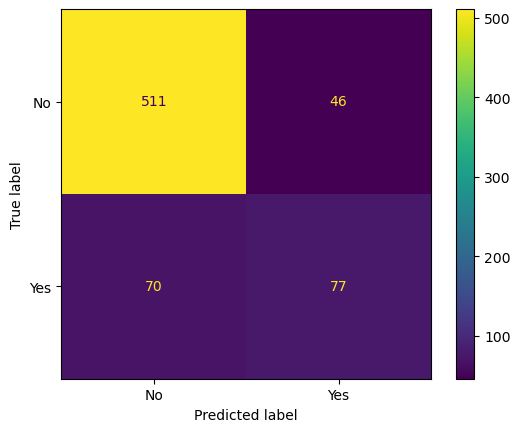

In [49]:
log_report.c_matrix()

                              Coefficient
Tenure Cohort_Over 48 Months     0.749289
InternetService_Fiber optic      0.593300
Tenure Cohort_37-48 Months       0.313897
TotalCharges                     0.247933
StreamingTV_Yes                  0.191724
                    Coefficient
OnlineSecurity_Yes    -0.139263
Contract_One year     -0.306624
MonthlyCharges        -0.389488
Contract_Two year     -0.597410
tenure                -1.736146


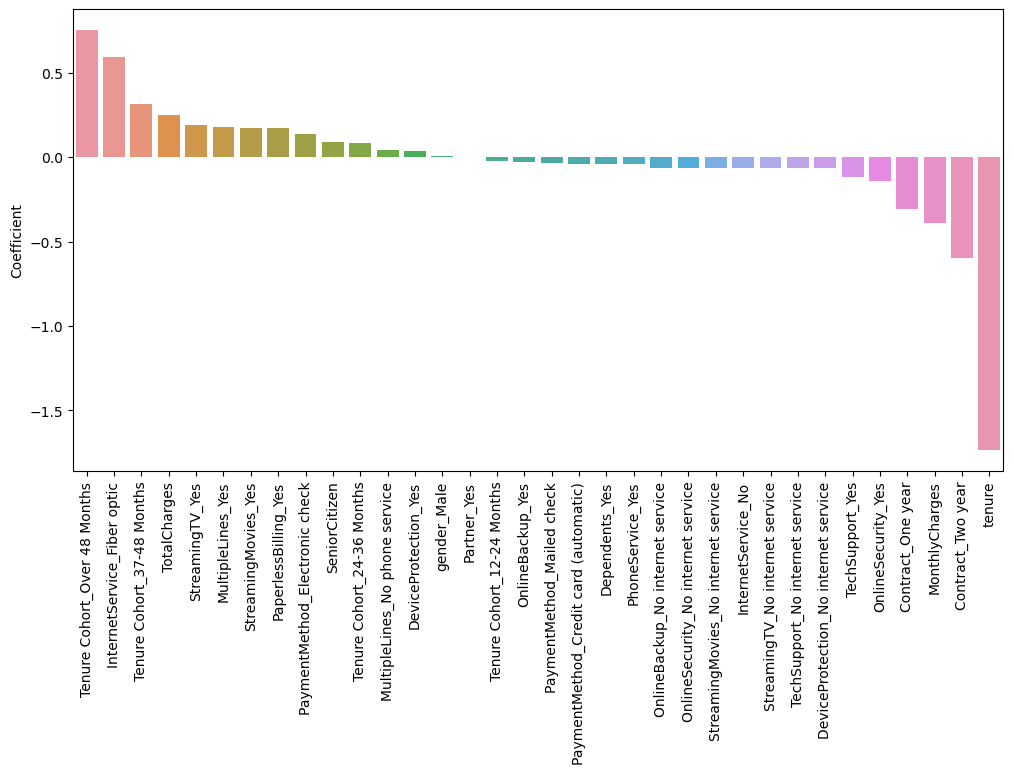

In [50]:
log_report.coef_graph()

From the chart above, we can see that the tenure, contract two year , and monthly charges all have negative coeffiecient.It mean that the higher the tenure decrease the chance of Churn. While Internet service fiber optic and tenure cohort 2 years (48 months) have positive correlation to churn, mean the higher the feature can influence in higher churn.

Even though, it seemed like contadict that the we said the higher the tenure, can influence in lower churn, but atthe same time we say that the higher the tenure cohort over 48 months, will influence in higher churn as well. But we have to realize, that it most likely the tenure cohort over 48 months was paid in montly contract and not in yearly contract

In [51]:
#log_coef_table = pd.DataFrame({'Feature': X.columns,'Coefficient': log_report.model.coef_.flatten()})

#log_coef_table = log_coef_table.sort_values(by='Coefficient', ascending=False)

#log_coef_table.head()

In [52]:
#plt.figure(figsize=(12,6))
#sns.barplot(data = log_coef_table, x='Feature', y='Coefficient')
#plt.xticks(rotation=90);


### SVC

In [53]:
from sklearn.svm import SVC

In [54]:
svc_model = SVC(kernel='linear')

In [55]:
svc_report = Report(svc_model,X, X_train, X_test, y_train, y_test)

In [56]:
svc_report.reporting()

The model accuracy score is 0.81
The model recall score is 0.40
The model precision score is 0.55


In [57]:
svc_report.class_report()

              precision    recall  f1-score   support

          No       0.85      0.91      0.88       557
         Yes       0.55      0.40      0.46       147

    accuracy                           0.81       704
   macro avg       0.70      0.66      0.67       704
weighted avg       0.79      0.81      0.79       704



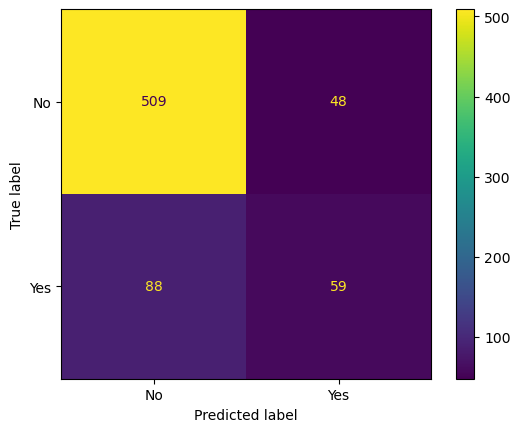

In [58]:
svc_report.c_matrix()

                                Coefficient
InternetService_Fiber optic        0.779606
StreamingMovies_Yes                0.135366
StreamingTV_Yes                    0.133519
MultipleLines_Yes                  0.109660
PaymentMethod_Electronic check     0.101462
                            Coefficient
Tenure Cohort_37-48 Months    -0.084235
Contract_One year             -0.087417
MonthlyCharges                -0.127283
Tenure Cohort_24-36 Months    -0.196214
TotalCharges                  -0.955182


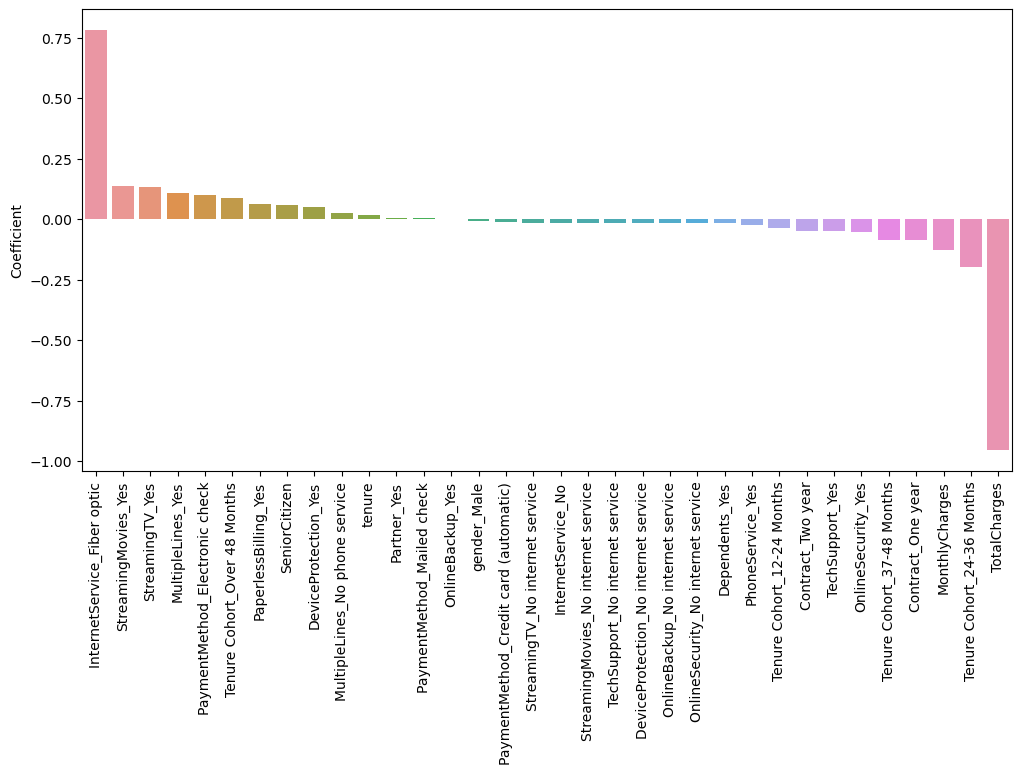

In [59]:
svc_report.coef_graph()

From using SVC model, we also got a pretty similar result with logistic regression model, with recall score slightly lower than logistic

In [60]:
#svc_coef_table = pd.DataFrame({'Feature': X.columns,'Coefficient': svc_report.model.coef_.flatten()})

#svc_coef_table = svc_coef_table.sort_values(by='Coefficient', ascending=False)

#svc_coef_table.head()


In [61]:
#plt.figure(figsize=(12,6))
#sns.barplot(data = log_coef_table, x='Feature', y='Coefficient')
#plt.xticks(rotation=90);

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc_model = RandomForestClassifier(max_depth=6)

In [64]:
rfc_report = Report(rfc_model,X, X_train, X_test, y_train, y_test)

In [65]:
rfc_report.reporting()

The model accuracy score is 0.82
The model recall score is 0.42
The model precision score is 0.61


In [66]:
rfc_report.class_report()

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       557
         Yes       0.61      0.42      0.50       147

    accuracy                           0.82       704
   macro avg       0.74      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



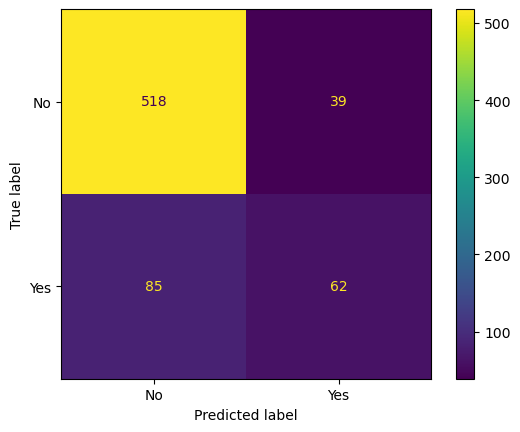

In [67]:
rfc_report.c_matrix()

                                Importances
tenure                             0.199094
TotalCharges                       0.115474
InternetService_Fiber optic        0.103958
PaymentMethod_Electronic check     0.074555
MonthlyCharges                     0.072958


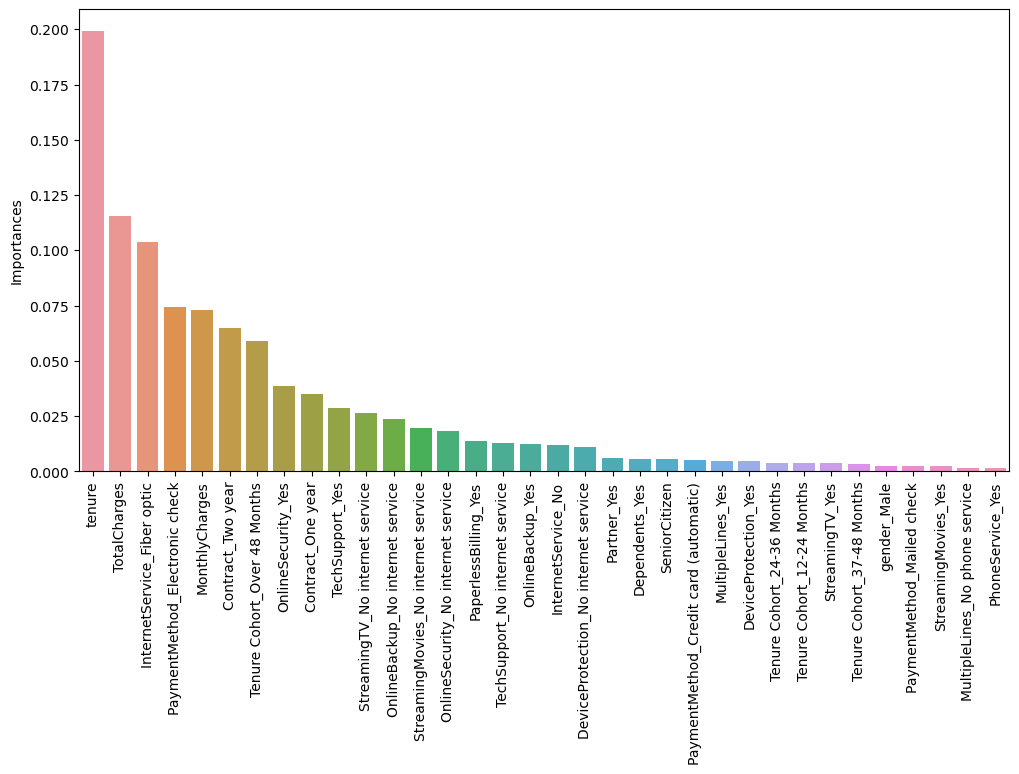

In [68]:
rfc_report.f_importances()

We can see from the chart that the top3 feature with highest importances to the model are tenure, total charges, and internet service fiber optic.

The accuracy score that we got from this model was quite similar to the other 2 models

### ADABoosting

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [71]:
ada_report = Report(ada_model,X, X_train, X_test, y_train, y_test)

In [72]:
ada_report.reporting()

The model accuracy score is 0.84
The model recall score is 0.52
The model precision score is 0.63


In [73]:
ada_report.class_report()

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.52      0.57       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



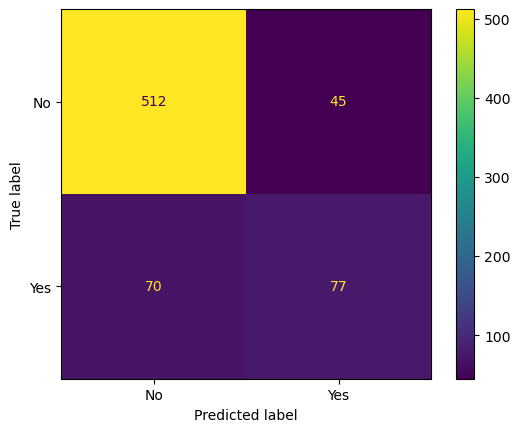

In [74]:
ada_report.c_matrix()

                                Importances
TotalCharges                           0.39
MonthlyCharges                         0.20
tenure                                 0.17
InternetService_Fiber optic            0.03
PaymentMethod_Electronic check         0.02


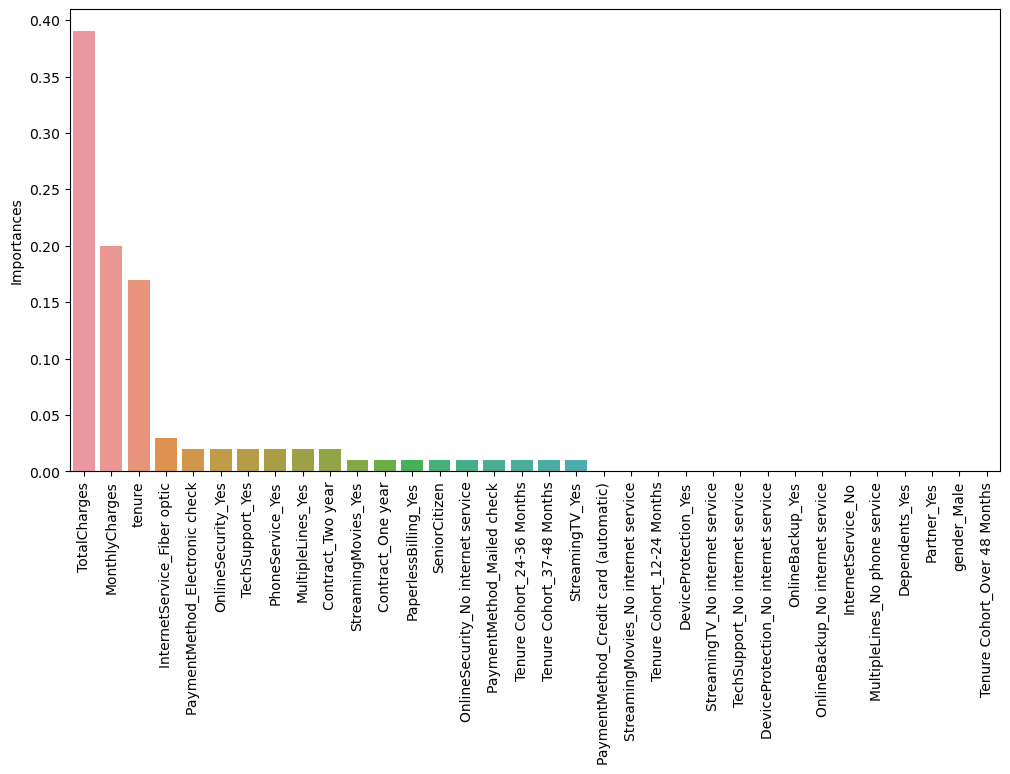

In [75]:
ada_report.f_importances()

We can see from the chart that the top 3 feature with highest importances to the model are total charges, tenure, total charges. it was really similar with the random forest model.

The accuracy score that we got from this model was quite similar to the other 3 models, with the overall best recall and precision score between the other models

### GradientBoosting

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
gbc_model = GradientBoostingClassifier()

In [106]:
gbc_report = Report(gbc_model,X, X_train, X_test, y_train, y_test)

In [107]:
gbc_report.reporting()

The model accuracy score is 0.81
The model recall score is 0.48
The model precision score is 0.56


In [108]:
gbc_report.class_report()

              precision    recall  f1-score   support

          No       0.87      0.90      0.88       557
         Yes       0.56      0.48      0.52       147

    accuracy                           0.81       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



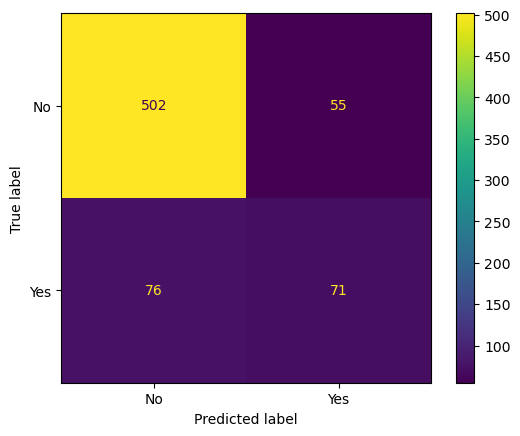

In [109]:
gbc_report.c_matrix()

                                Importances
tenure                             0.311106
InternetService_Fiber optic        0.194819
PaymentMethod_Electronic check     0.106868
TotalCharges                       0.080152
Contract_Two year                  0.068702


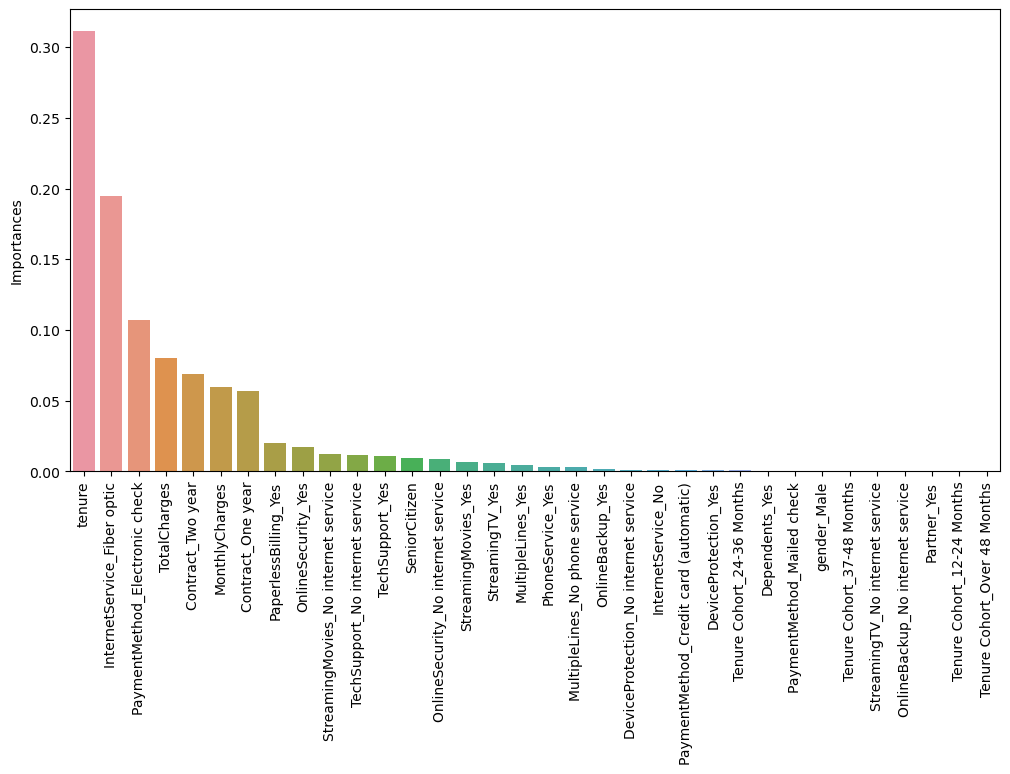

In [110]:
gbc_report.f_importances()

We can see that there is a slight difference in the highest feature importances using this model. Tenure is the highest followed by intersner service fiber optic and payment method electronic check. it was really similar with the random forest model.

The accuracy score that we got from this model was quite similar to the other 3 models, with the overall best recall and precision score between the other models

### XGBoost

In [111]:
from xgboost import XGBClassifier

In [162]:
xgb_model = XGBClassifier()

In [163]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable 'y'
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [164]:
xgb_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [165]:
y_pred_xgb = xgb_model.predict(X_test)

In [166]:
print(classification_report(y_test_encoded, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       557
           1       0.54      0.52      0.53       147

    accuracy                           0.81       704
   macro avg       0.71      0.70      0.71       704
weighted avg       0.81      0.81      0.81       704



In [167]:
xgb_model.feature_importances_

array([0.00937909, 0.02146245, 0.00902946, 0.00899528, 0.0077194 ,
       0.00654714, 0.00757143, 0.01452375, 0.        , 0.01245575,
       0.43658647, 0.09090813, 0.        , 0.01357837, 0.        ,
       0.0108487 , 0.        , 0.00975809, 0.        , 0.01107044,
       0.        , 0.00949048, 0.        , 0.02204357, 0.05796344,
       0.17623724, 0.00987094, 0.0083312 , 0.01512215, 0.00737169,
       0.00768589, 0.00673544, 0.00871409, 0.        ], dtype=float32)

In [168]:
xgb_table = pd.DataFrame(index= X.columns,
                          data= xgb_model.feature_importances_.flatten(),
                        columns=['Importances'])
xgb_table = xgb_table.sort_values(by='Importances', ascending=False)

xgb_table.head()

,Importances
InternetService_Fiber optic,0.436586
Contract_Two year,0.176237
InternetService_No,0.090908
Contract_One year,0.057963
StreamingMovies_Yes,0.022044


In [173]:
#predicted_prob_xg = xgb_model.predict_proba(X_test)

In [174]:
#predicted_prob_xg[0:5]

array([[0.4517792 , 0.5482208 ],
       [0.76646423, 0.23353575],
       [0.6931219 , 0.30687812],
       [0.13268423, 0.86731577],
       [0.99574816, 0.00425184]], dtype=float32)

In [175]:
#y_pred_xgb[0:5]

array([1, 0, 0, 1, 0])

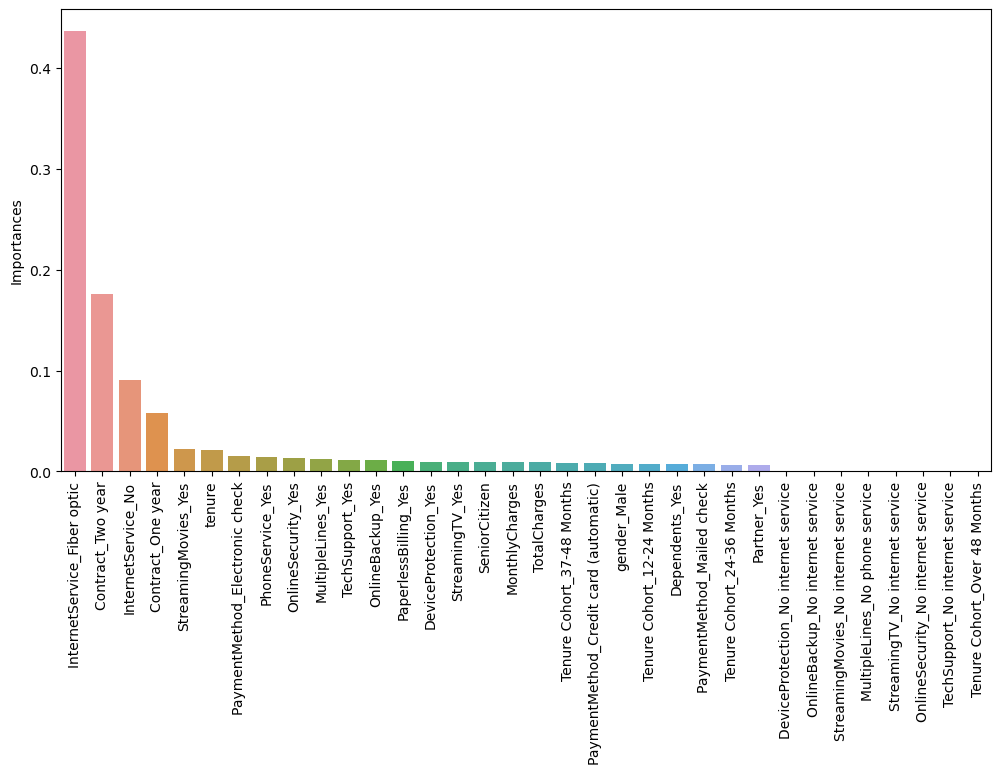

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(data = xgb_table, x=xgb_table.index, y='Importances')
plt.xticks(rotation=90)
plt.show()

Most of the model that we have used so far gave us a low recall score, which is not good to  predict which customer have the probability to churn, which is why we will try to use SMOTEENN  technique to handle imbalance data

SMOTEENN is a combination of two resampling techniques: Synthetic Minority Over-sampling Technique (SMOTE) and Edited Nearest Neighbors (ENN). It first applies SMOTE to oversample the minority class and then applies ENN to remove noisy samples and instances of the majority class that are misclassified by a K-nearest neighbor classifier.

In [120]:
from imblearn.combine import SMOTEENN

In [148]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [149]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=101)


We will use AdaBoost model, because from our previous modelling, AdaBoost turn out to have the overral best accuracy and recall score

In [150]:
ada_model_resampled = AdaBoostClassifier()


In [151]:
ada_model_resampled_report = Report(ada_model_resampled, X, xr_train,xr_test,yr_train,yr_test)

In [152]:
ada_model_resampled_report.reporting()

The model accuracy score is 0.94
The model recall score is 0.96
The model precision score is 0.93


In [153]:
ada_model_resampled_report.class_report()

              precision    recall  f1-score   support

          No       0.95      0.92      0.94       528
         Yes       0.93      0.96      0.95       628

    accuracy                           0.94      1156
   macro avg       0.94      0.94      0.94      1156
weighted avg       0.94      0.94      0.94      1156



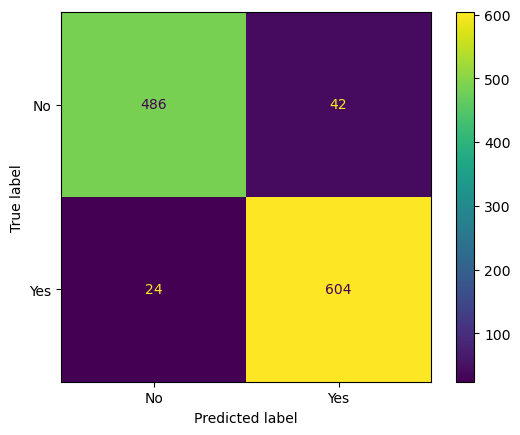

In [154]:
ada_model_resampled_report.c_matrix()

using SMOTEENN we were able to increase both accuarcy score and recall score to 93%

                             Importances
MonthlyCharges                      0.24
TotalCharges                        0.16
tenure                              0.12
InternetService_Fiber optic         0.12
Contract_Two year                   0.04


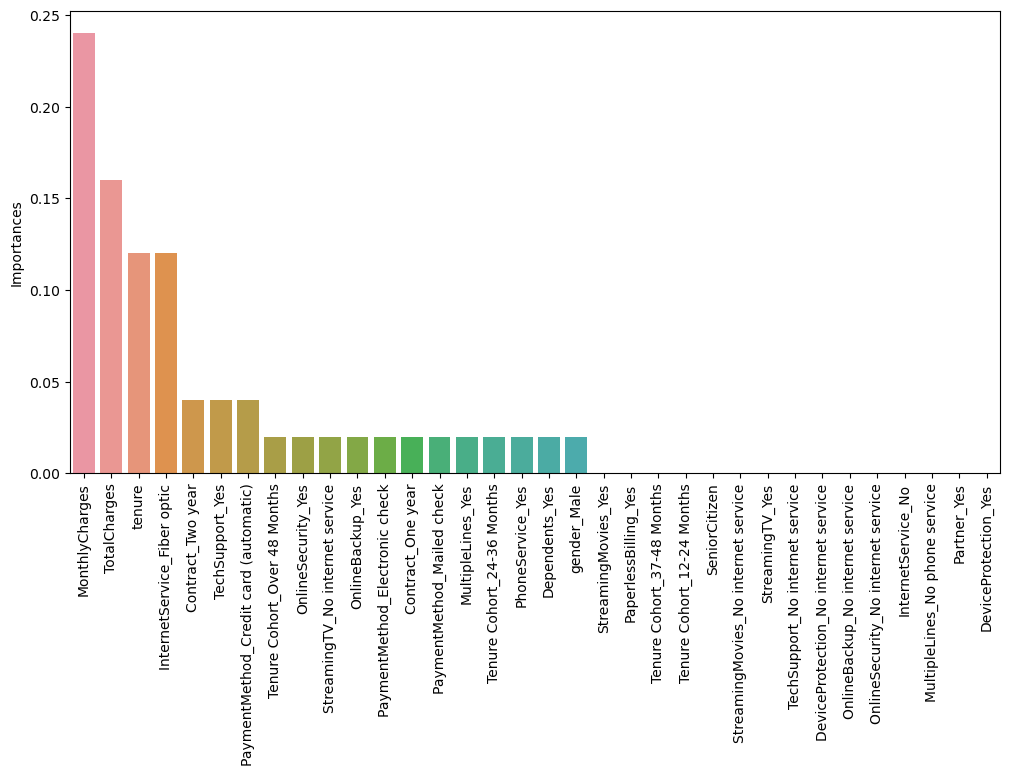

In [155]:
ada_model_resampled_report.f_importances()

In [176]:
#predicted_prob = ada_model_resampled_report.predicted_probabilities()

In [177]:
#predicted_prob[0:20]

In [178]:
#ada_model_resampled_report.y_pred[0:10]

### Conclusion

From all the machine learning model that we have used, we can conclude that AdaBoost model has the best accuracy and recall score with 84% accuracy score and recall 54%. 

And we were able to further improved our model significantly by using SMOTEENN from 84% accuracy score to 94% and from 54% to 96% recall score.

Most of the modeling that we have created, we can see that most of it stated that Tenure, tow year contact and internet service with fiber optic has the the highest feature importances to most of our model in predicting the churn rate.


### Pickling the model

In [209]:
import pickle

In [214]:
filename = 'model.sav'


In [215]:
pickle.dump(ada_model_resampled, open(filename, 'wb'))

In [216]:
load_model = pickle.load(open(filename, 'rb'))

In [218]:
model_score_r1 = load_model.score(xr_test, yr_test)


In [219]:
model_score_r1

0.9349871685201027